# EcoGPT Analytics Dashboard
## Line Plot Visualization of Energy, Cost, and Token Metrics

This notebook creates comprehensive line plots to visualize various metrics from the EcoGPT logs database, including energy consumption, costs, and token usage patterns over time.

## 1. Database Connection and Data Loading
Connect to MySQL database and load the logs data for analysis.

In [2]:
from flask_sqlalchemy import SQLAlchemy
from sqlalchemy import text, create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import os

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [3]:
# Connect to database and load data
engine = create_engine(os.getenv('MYSQL_URI')).connect() 
logs = pd.read_sql_table('logs', con=engine)

# Convert datetime column to proper datetime type
logs['datetime'] = pd.to_datetime(logs['datetime'])

print(f"Loaded {len(logs)} records from logs table")
print(f"Date range: {logs['datetime'].min()} to {logs['datetime'].max()}")

Loaded 31 records from logs table
Date range: 2025-10-09 17:38:20 to 2025-10-10 05:37:18


## 2. Data Exploration and Inspection
Examine the structure and basic statistics of our dataset.

In [4]:
# Display basic information about the dataset
print("Dataset Info:")
print(f"Shape: {logs.shape}")
print("\nColumn names:")
print(logs.columns.tolist())

Dataset Info:
Shape: (31, 21)

Column names:
['id', 'previous_id', 'datetime', 'wh', 'ml', 'g_co2', 'usd_in', 'usd_cache', 'usd_out', 'tokens', 'input_tokens', 'input_tokens_tokenizer', 'output_tokens', 'output_tokens_tokenizer', 'cached_tokens', 'total_wh', 'total_ml', 'total_co2', 'total_usd', 'total_tokens', 'total_cached_tokens']


In [5]:
# Display first few rows and basic statistics
print("First 5 rows:")
print(logs.head())

print("\nBasic Statistics:")
print(logs.describe())

First 5 rows:
                                                  id  \
0  resp_062de635b521179a0068e7f3872cec8191a94d12d...   
1  resp_062de635b521179a0068e7f394f85081919d93ab1...   
2  resp_062de635b521179a0068e7f3b4bb208191a16fa02...   
3  resp_062de635b521179a0068e7f3e05da881918261290...   
4  resp_0782504171ea3dbe0068e7f8e1e8cc81a0918d3a2...   

                                         previous_id            datetime  \
0                                               None 2025-10-09 17:40:23   
1  resp_062de635b521179a0068e7f3872cec8191a94d12d... 2025-10-09 17:40:37   
2  resp_062de635b521179a0068e7f394f85081919d93ab1... 2025-10-09 17:41:09   
3  resp_062de635b521179a0068e7f3b4bb208191a16fa02... 2025-10-09 17:41:52   
4                                               None 2025-10-09 18:03:13   

        wh        ml      g_co2    usd_in  usd_cache  usd_out  tokens  ...  \
0    0.486    0.8748    0.16038  0.000029   0.000002  0.00021      44  ...   
1  328.644  591.5592  108.45252  0.0

## 3. Basic Line Plot Creation
Create simple line plots for individual energy and environmental metrics.

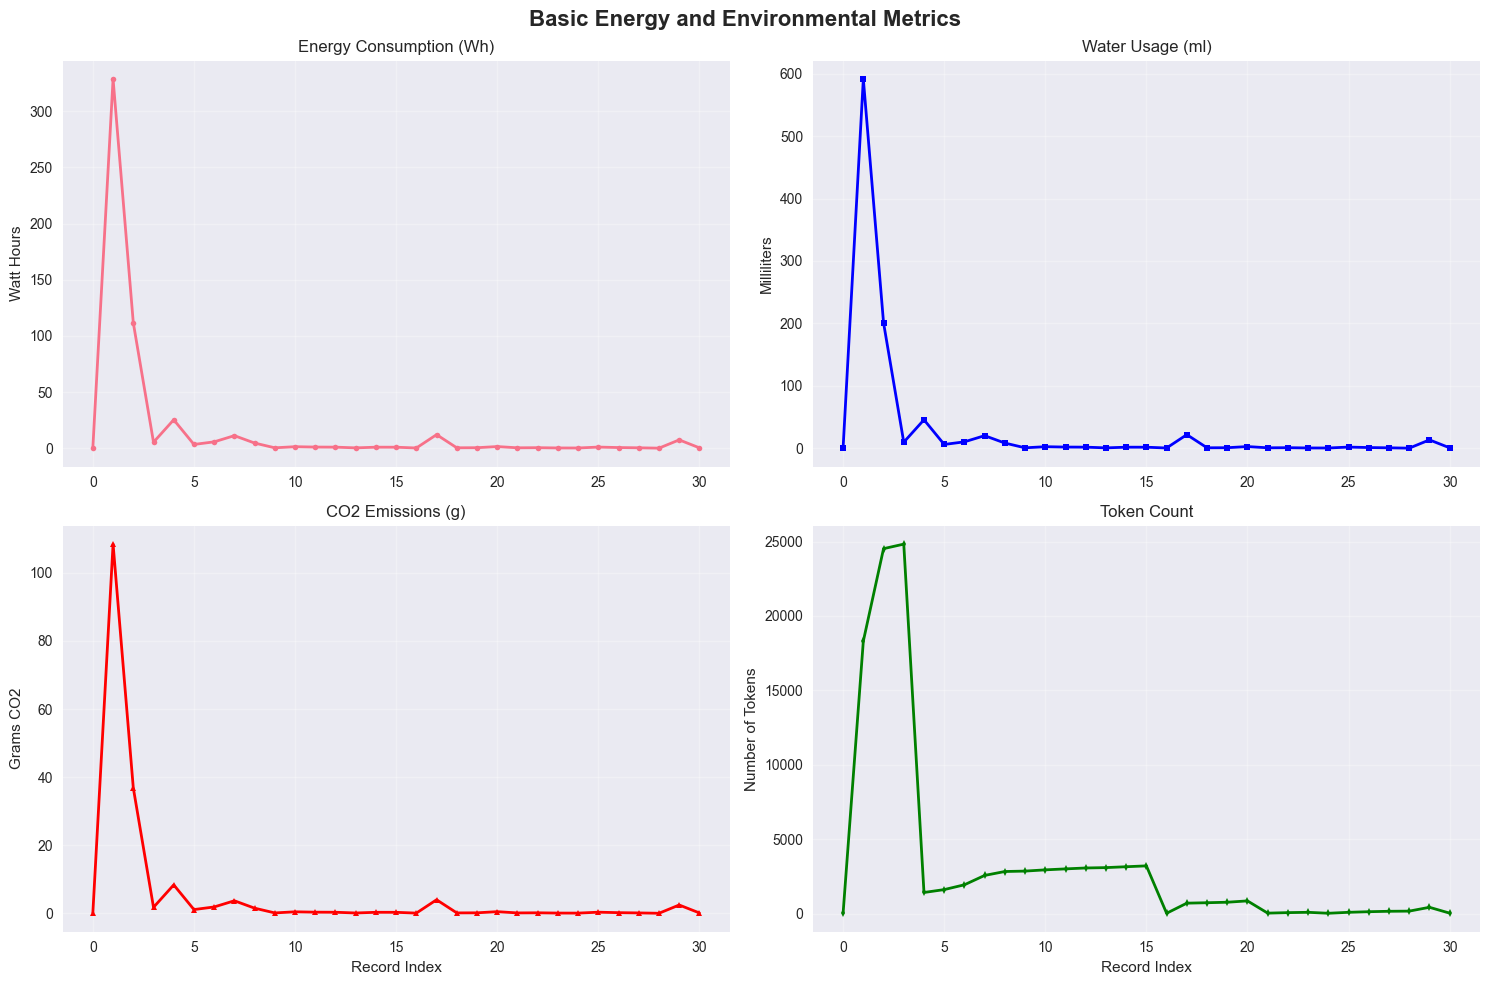

In [6]:
# Create subplots for basic metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Basic Energy and Environmental Metrics', fontsize=16, fontweight='bold')

# Energy consumption (Wh)
axes[0,0].plot(logs.index, logs['wh'], marker='o', linewidth=2, markersize=4)
axes[0,0].set_title('Energy Consumption (Wh)')
axes[0,0].set_ylabel('Watt Hours')
axes[0,0].grid(True, alpha=0.3)

# Water usage (ml)
axes[0,1].plot(logs.index, logs['ml'], marker='s', linewidth=2, markersize=4, color='blue')
axes[0,1].set_title('Water Usage (ml)')
axes[0,1].set_ylabel('Milliliters')
axes[0,1].grid(True, alpha=0.3)

# CO2 emissions (g)
axes[1,0].plot(logs.index, logs['g_co2'], marker='^', linewidth=2, markersize=4, color='red')
axes[1,0].set_title('CO2 Emissions (g)')
axes[1,0].set_ylabel('Grams CO2')
axes[1,0].set_xlabel('Record Index')
axes[1,0].grid(True, alpha=0.3)

# Token count
axes[1,1].plot(logs.index, logs['tokens'], marker='d', linewidth=2, markersize=4, color='green')
axes[1,1].set_title('Token Count')
axes[1,1].set_ylabel('Number of Tokens')
axes[1,1].set_xlabel('Record Index')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Multi-Series Line Plots
Compare multiple related metrics on the same chart to identify correlations.

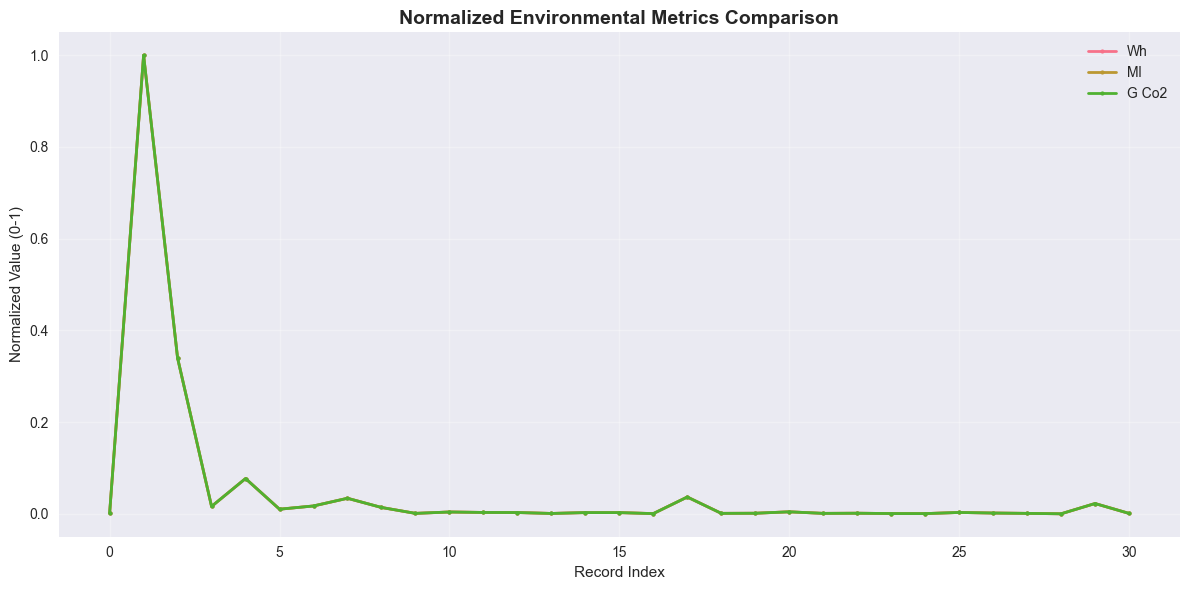

In [7]:
# Normalize data for comparison (scale to 0-1)
metrics_to_compare = ['wh', 'ml', 'g_co2']
normalized_data = logs[metrics_to_compare].copy()

for col in metrics_to_compare:
    normalized_data[col] = (logs[col] - logs[col].min()) / (logs[col].max() - logs[col].min())

# Create multi-series plot
plt.figure(figsize=(12, 6))
for col in metrics_to_compare:
    plt.plot(logs.index, normalized_data[col], marker='o', linewidth=2, label=col.replace('_', ' ').title(), markersize=3)

plt.title('Normalized Environmental Metrics Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Record Index')
plt.ylabel('Normalized Value (0-1)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Time Series Plotting
Create time-based visualizations to show trends over actual time periods.

<Figure size 1400x800 with 0 Axes>

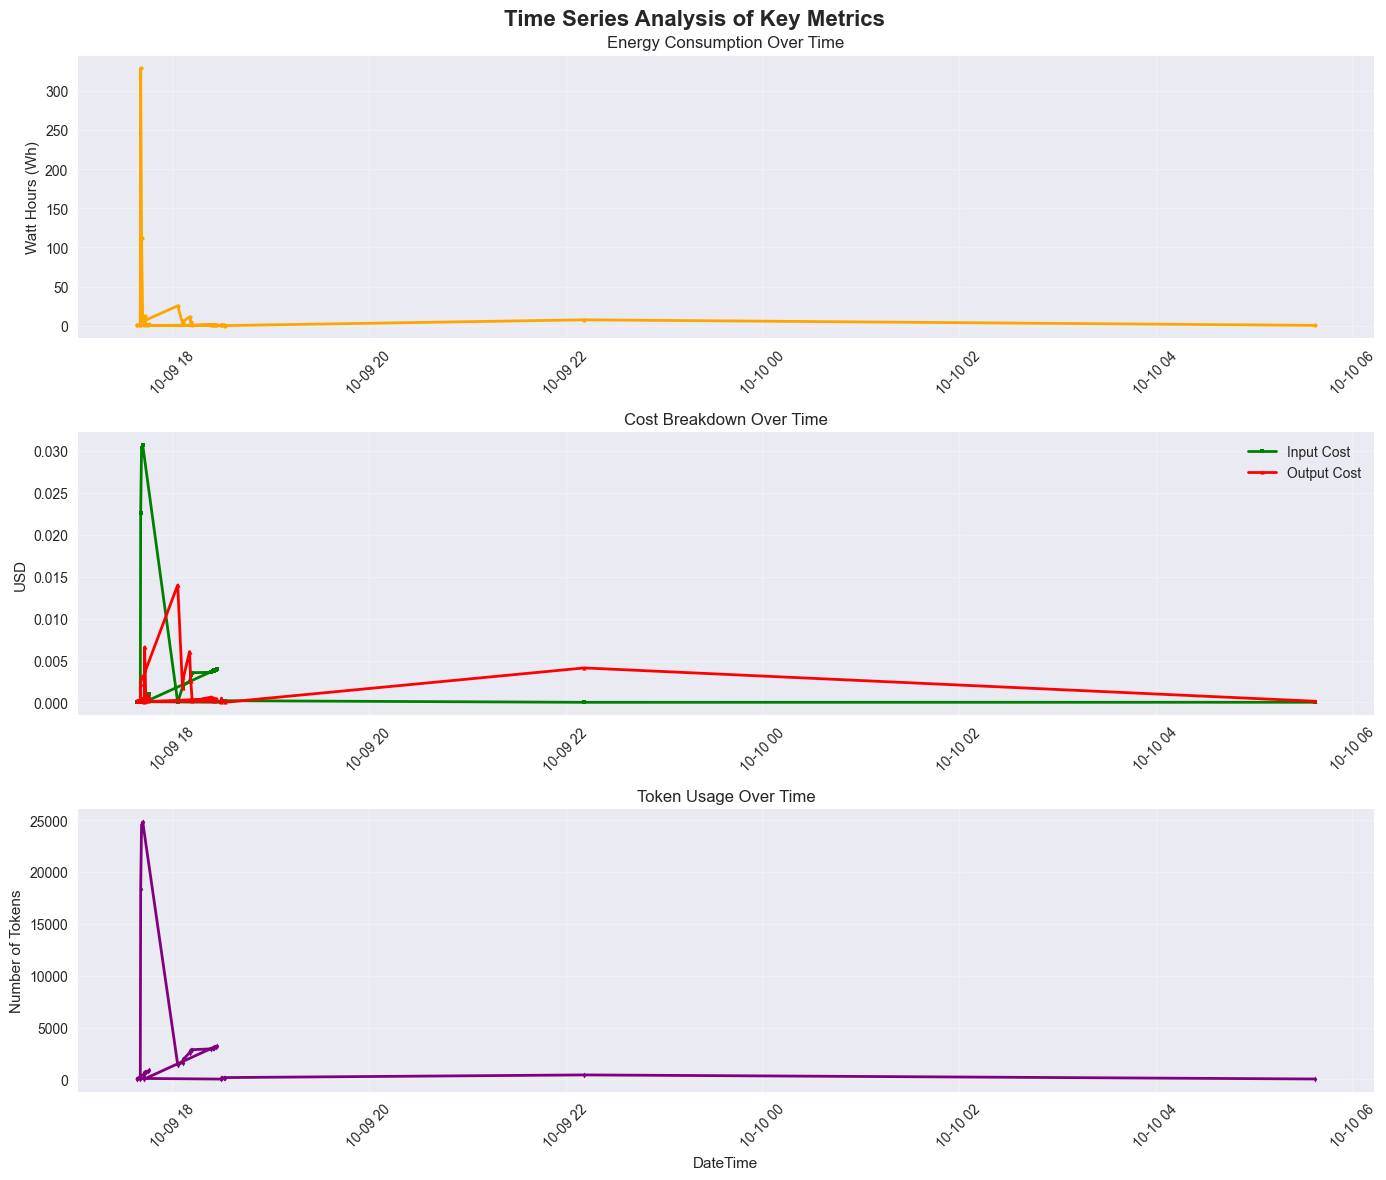

In [8]:
# Time series plot of energy consumption
plt.figure(figsize=(14, 8))

# Create subplots for time series
fig, axes = plt.subplots(3, 1, figsize=(14, 12))
fig.suptitle('Time Series Analysis of Key Metrics', fontsize=16, fontweight='bold')

# Energy over time
axes[0].plot(logs['datetime'], logs['wh'], marker='o', linewidth=2, markersize=3, color='orange')
axes[0].set_title('Energy Consumption Over Time')
axes[0].set_ylabel('Watt Hours (Wh)')
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Costs over time
axes[1].plot(logs['datetime'], logs['usd_in'], marker='s', linewidth=2, markersize=3, label='Input Cost', color='green')
axes[1].plot(logs['datetime'], logs['usd_out'], marker='^', linewidth=2, markersize=3, label='Output Cost', color='red')
axes[1].set_title('Cost Breakdown Over Time')
axes[1].set_ylabel('USD')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

# Tokens over time
axes[2].plot(logs['datetime'], logs['tokens'], marker='d', linewidth=2, markersize=3, color='purple')
axes[2].set_title('Token Usage Over Time')
axes[2].set_xlabel('DateTime')
axes[2].set_ylabel('Number of Tokens')
axes[2].grid(True, alpha=0.3)
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 6. Energy Consumption Analysis
Detailed visualization of energy patterns including individual and cumulative usage.

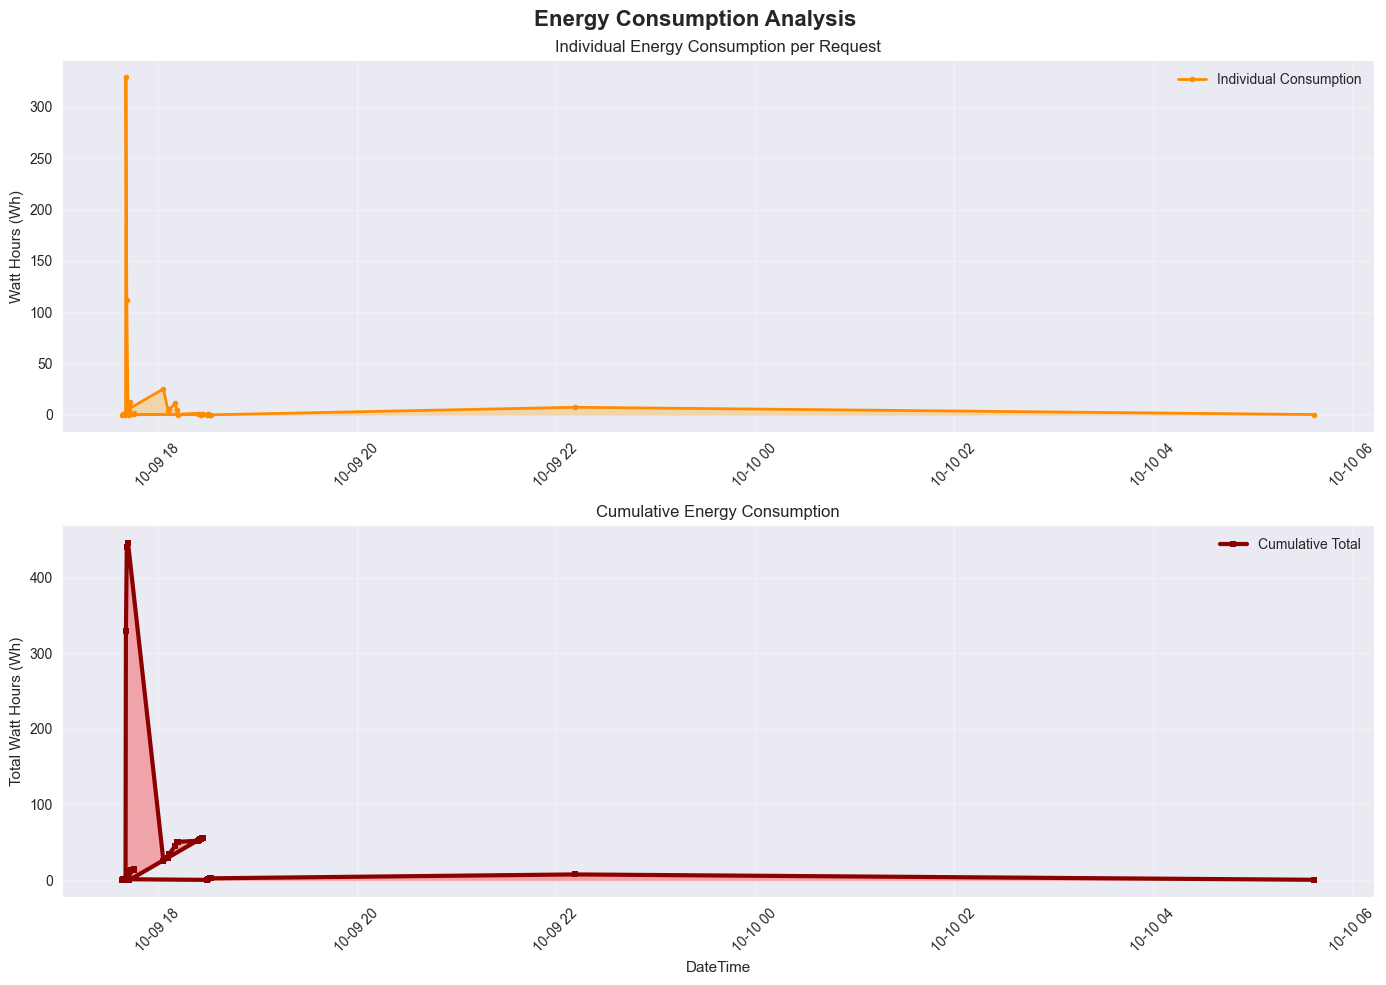

In [9]:
# Energy consumption analysis
fig, axes = plt.subplots(2, 1, figsize=(14, 10))
fig.suptitle('Energy Consumption Analysis', fontsize=16, fontweight='bold')

# Individual energy consumption
axes[0].plot(logs['datetime'], logs['wh'], marker='o', linewidth=2, markersize=4, color='darkorange', label='Individual Consumption')
axes[0].fill_between(logs['datetime'], logs['wh'], alpha=0.3, color='orange')
axes[0].set_title('Individual Energy Consumption per Request')
axes[0].set_ylabel('Watt Hours (Wh)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Cumulative energy consumption
axes[1].plot(logs['datetime'], logs['total_wh'], marker='s', linewidth=3, markersize=4, color='darkred', label='Cumulative Total')
axes[1].fill_between(logs['datetime'], logs['total_wh'], alpha=0.3, color='red')
axes[1].set_title('Cumulative Energy Consumption')
axes[1].set_xlabel('DateTime')
axes[1].set_ylabel('Total Watt Hours (Wh)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

for ax in axes:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 7. Cost Analysis Visualization
Comprehensive view of cost metrics including input, output, and total costs.

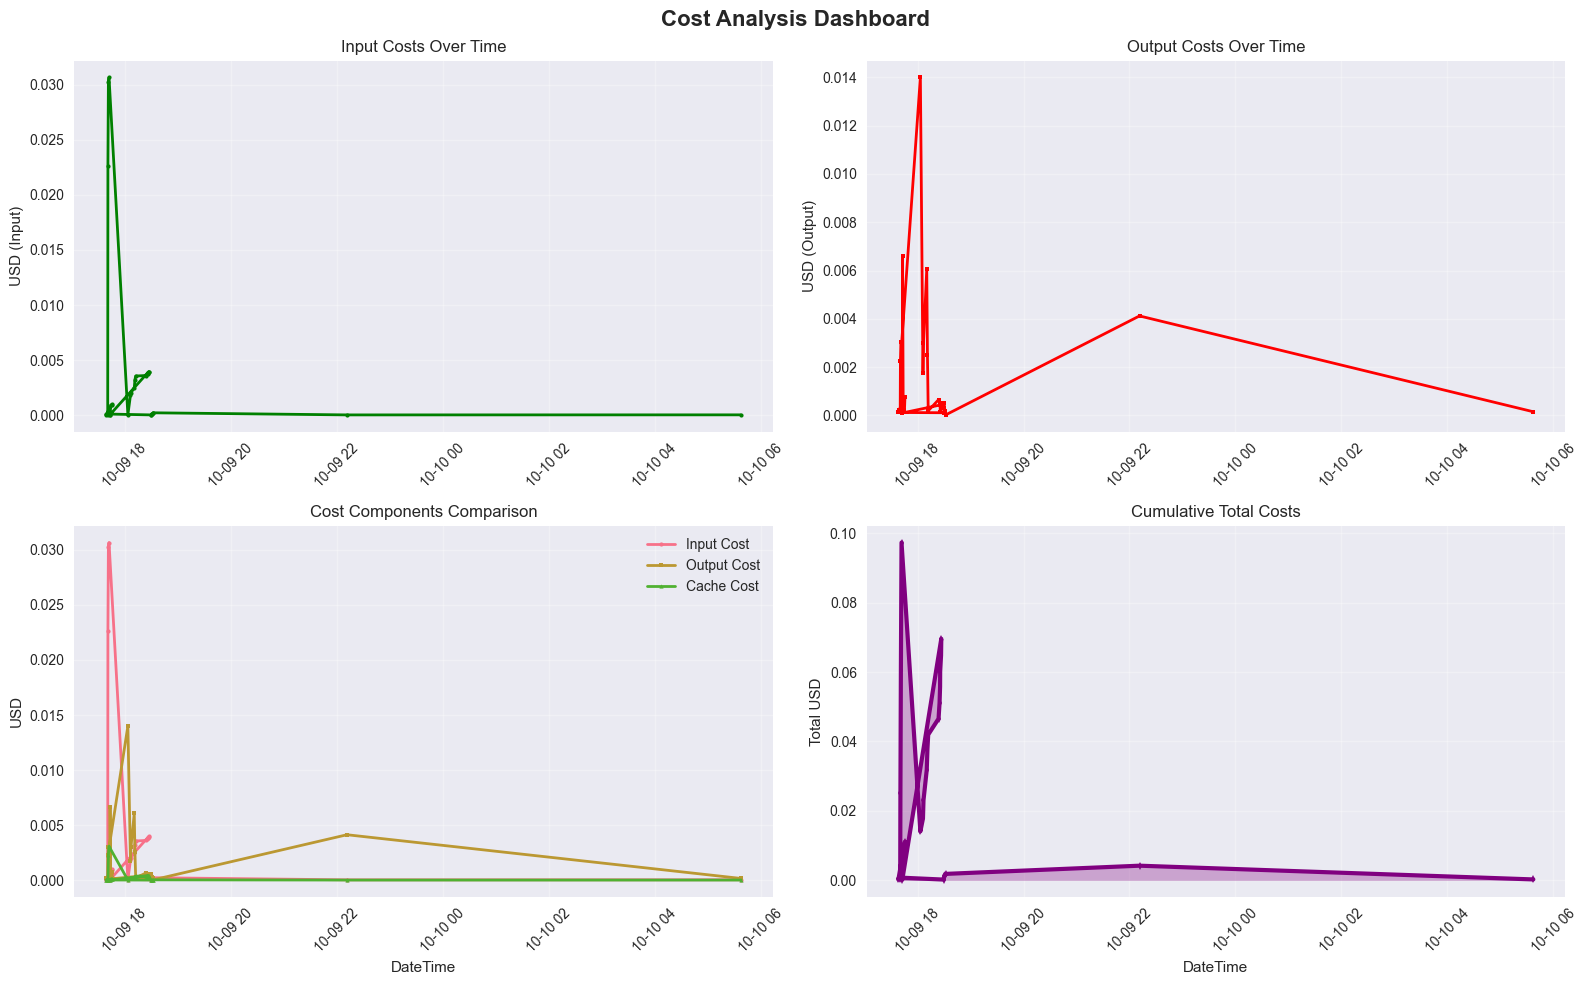

In [10]:
# Cost analysis visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Cost Analysis Dashboard', fontsize=16, fontweight='bold')

# Input costs over time
axes[0,0].plot(logs['datetime'], logs['usd_in'], marker='o', linewidth=2, color='green', markersize=3)
axes[0,0].set_title('Input Costs Over Time')
axes[0,0].set_ylabel('USD (Input)')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].tick_params(axis='x', rotation=45)

# Output costs over time
axes[0,1].plot(logs['datetime'], logs['usd_out'], marker='s', linewidth=2, color='red', markersize=3)
axes[0,1].set_title('Output Costs Over Time')
axes[0,1].set_ylabel('USD (Output)')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].tick_params(axis='x', rotation=45)

# Cost comparison
axes[1,0].plot(logs['datetime'], logs['usd_in'], marker='o', linewidth=2, label='Input Cost', markersize=3)
axes[1,0].plot(logs['datetime'], logs['usd_out'], marker='s', linewidth=2, label='Output Cost', markersize=3)
axes[1,0].plot(logs['datetime'], logs['usd_cache'], marker='^', linewidth=2, label='Cache Cost', markersize=3)
axes[1,0].set_title('Cost Components Comparison')
axes[1,0].set_ylabel('USD')
axes[1,0].set_xlabel('DateTime')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)
axes[1,0].tick_params(axis='x', rotation=45)

# Total cumulative costs
axes[1,1].plot(logs['datetime'], logs['total_usd'], marker='d', linewidth=3, color='purple', markersize=4)
axes[1,1].fill_between(logs['datetime'], logs['total_usd'], alpha=0.3, color='purple')
axes[1,1].set_title('Cumulative Total Costs')
axes[1,1].set_xlabel('DateTime')
axes[1,1].set_ylabel('Total USD')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 8. Token Usage Tracking
Detailed analysis of token consumption patterns including input, output, and cached tokens.

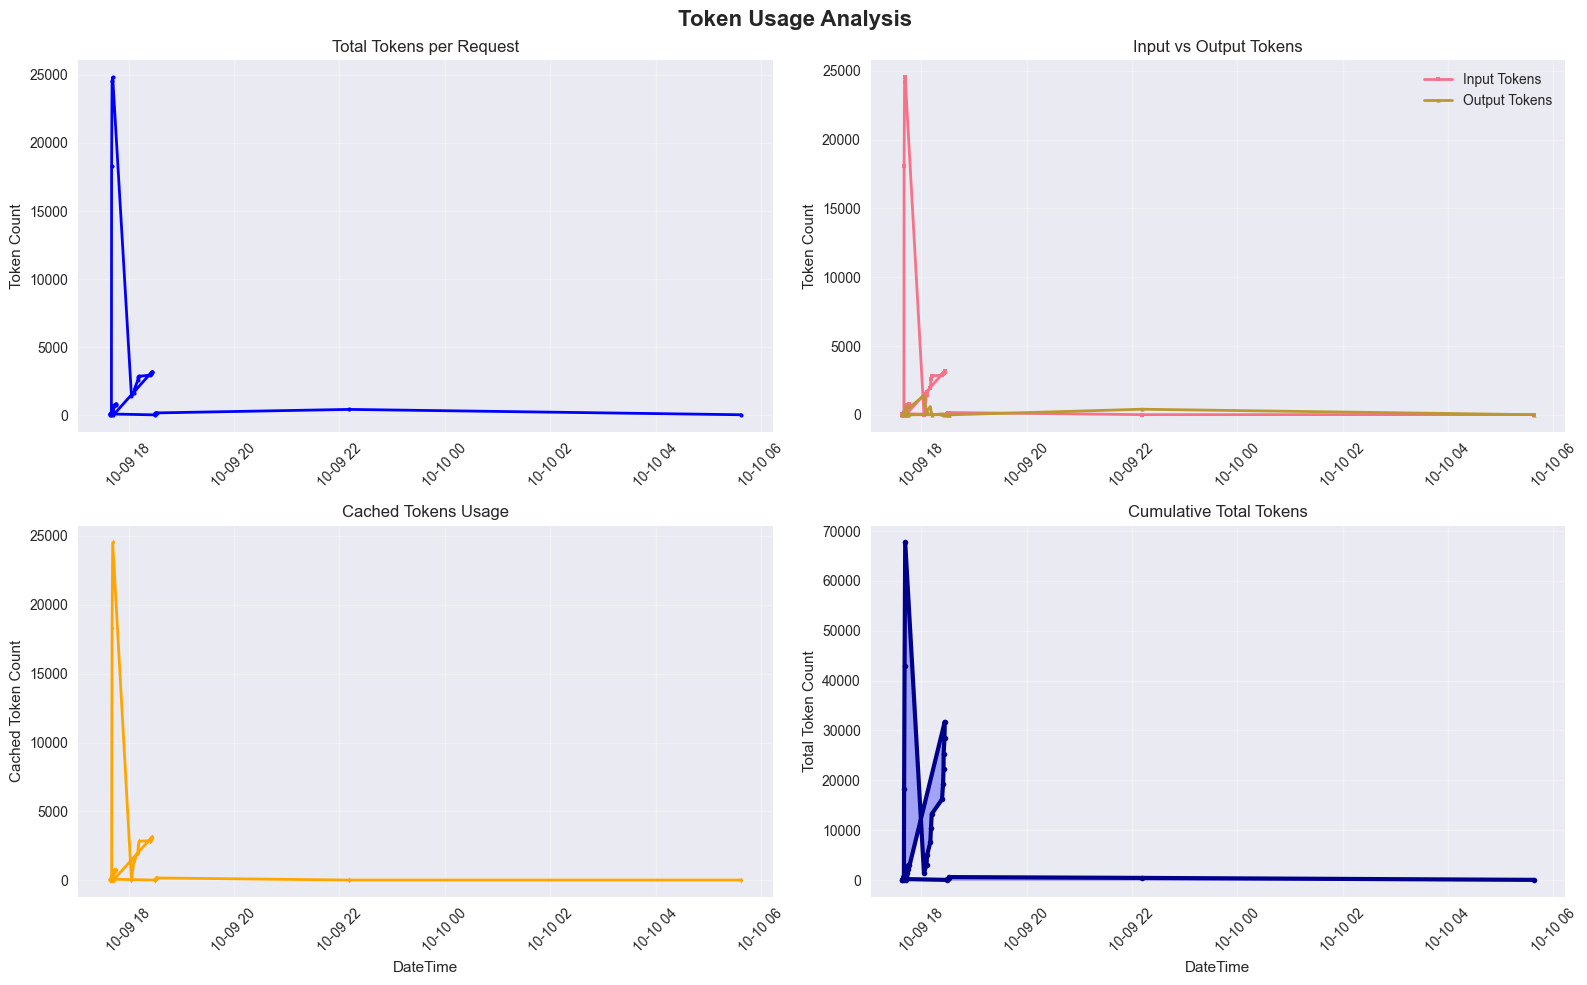

In [11]:
# Token usage analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Token Usage Analysis', fontsize=16, fontweight='bold')

# Total tokens per request
axes[0,0].plot(logs['datetime'], logs['tokens'], marker='o', linewidth=2, color='blue', markersize=3)
axes[0,0].set_title('Total Tokens per Request')
axes[0,0].set_ylabel('Token Count')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].tick_params(axis='x', rotation=45)

# Input vs Output tokens
if 'input_tokens' in logs.columns and 'output_tokens' in logs.columns:
    axes[0,1].plot(logs['datetime'], logs['input_tokens'], marker='s', linewidth=2, label='Input Tokens', markersize=3)
    axes[0,1].plot(logs['datetime'], logs['output_tokens'], marker='^', linewidth=2, label='Output Tokens', markersize=3)
    axes[0,1].set_title('Input vs Output Tokens')
    axes[0,1].set_ylabel('Token Count')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    axes[0,1].tick_params(axis='x', rotation=45)

# Cached tokens utilization
if 'cached_tokens' in logs.columns:
    axes[1,0].plot(logs['datetime'], logs['cached_tokens'], marker='d', linewidth=2, color='orange', markersize=3)
    axes[1,0].set_title('Cached Tokens Usage')
    axes[1,0].set_ylabel('Cached Token Count')
    axes[1,0].set_xlabel('DateTime')
    axes[1,0].grid(True, alpha=0.3)
    axes[1,0].tick_params(axis='x', rotation=45)

# Cumulative total tokens
axes[1,1].plot(logs['datetime'], logs['total_tokens'], marker='o', linewidth=3, color='darkblue', markersize=4)
axes[1,1].fill_between(logs['datetime'], logs['total_tokens'], alpha=0.3, color='blue')
axes[1,1].set_title('Cumulative Total Tokens')
axes[1,1].set_xlabel('DateTime')
axes[1,1].set_ylabel('Total Token Count')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 9. Cumulative Metrics Plotting
Comprehensive view of all cumulative metrics to track running totals.

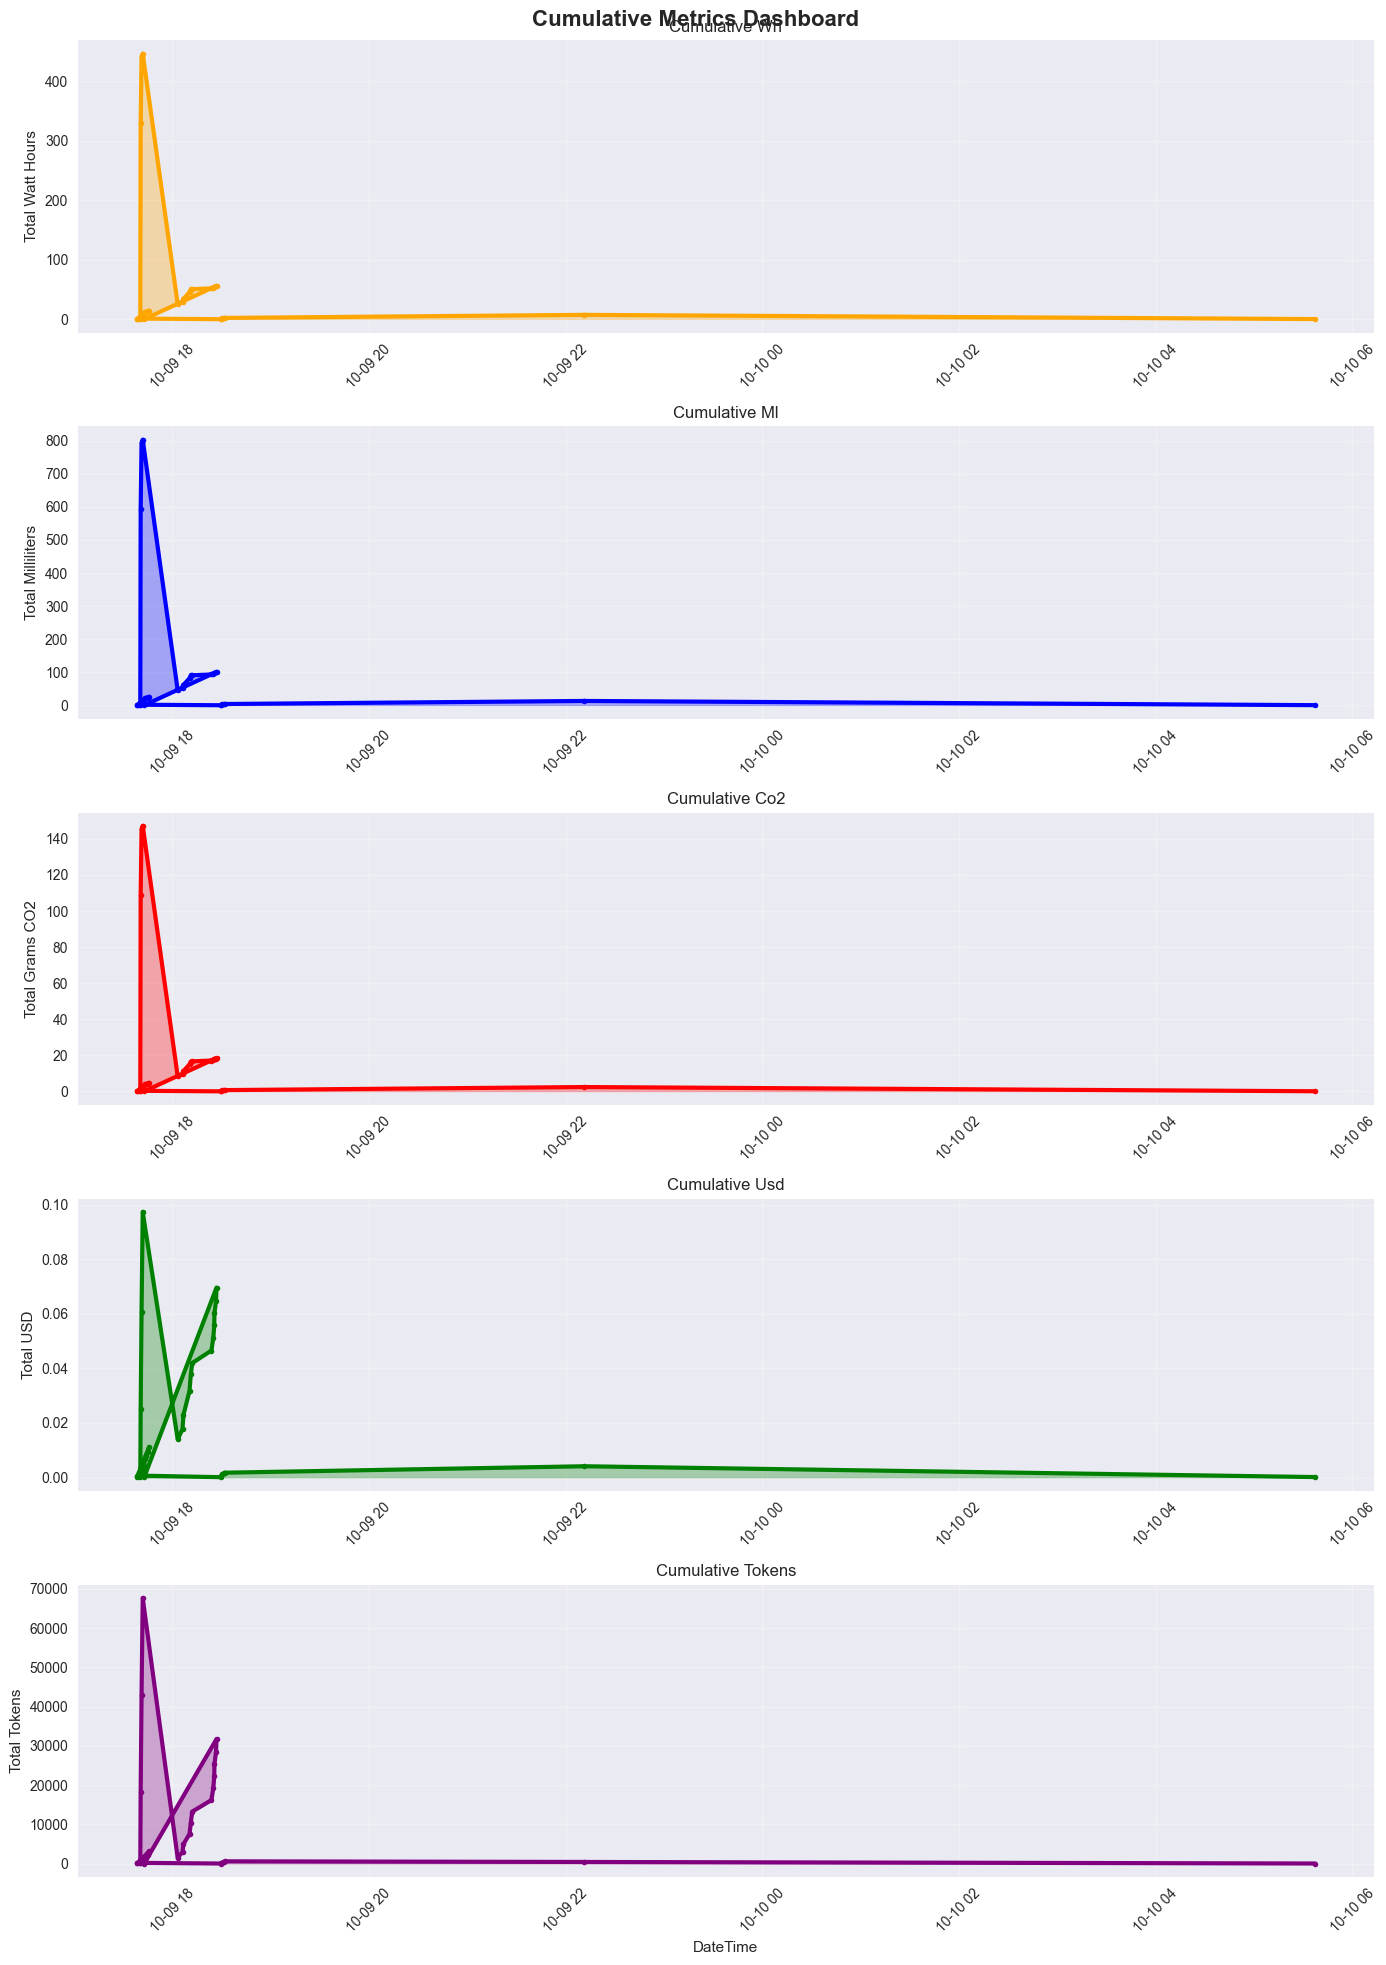

In [12]:
# Cumulative metrics dashboard
cumulative_cols = ['total_wh', 'total_ml', 'total_co2', 'total_usd', 'total_tokens']
available_cumulative = [col for col in cumulative_cols if col in logs.columns]

fig, axes = plt.subplots(len(available_cumulative), 1, figsize=(14, 4*len(available_cumulative)))
fig.suptitle('Cumulative Metrics Dashboard', fontsize=16, fontweight='bold')

if len(available_cumulative) == 1:
    axes = [axes]

colors = ['orange', 'blue', 'red', 'green', 'purple']

for idx, col in enumerate(available_cumulative):
    axes[idx].plot(logs['datetime'], logs[col], marker='o', linewidth=3, 
                   color=colors[idx % len(colors)], markersize=4)
    axes[idx].fill_between(logs['datetime'], logs[col], alpha=0.3, color=colors[idx % len(colors)])
    
    # Format column name for title
    title = col.replace('total_', '').replace('_', ' ').title()
    axes[idx].set_title(f'Cumulative {title}')
    
    # Set appropriate y-label
    if 'wh' in col:
        axes[idx].set_ylabel('Total Watt Hours')
    elif 'ml' in col:
        axes[idx].set_ylabel('Total Milliliters')
    elif 'co2' in col:
        axes[idx].set_ylabel('Total Grams CO2')
    elif 'usd' in col:
        axes[idx].set_ylabel('Total USD')
    elif 'tokens' in col:
        axes[idx].set_ylabel('Total Tokens')
    
    axes[idx].grid(True, alpha=0.3)
    axes[idx].tick_params(axis='x', rotation=45)

if available_cumulative:
    axes[-1].set_xlabel('DateTime')

plt.tight_layout()
plt.show()

## 10. Plot Customization and Styling
Enhanced visualizations with professional styling and comprehensive dashboard view.

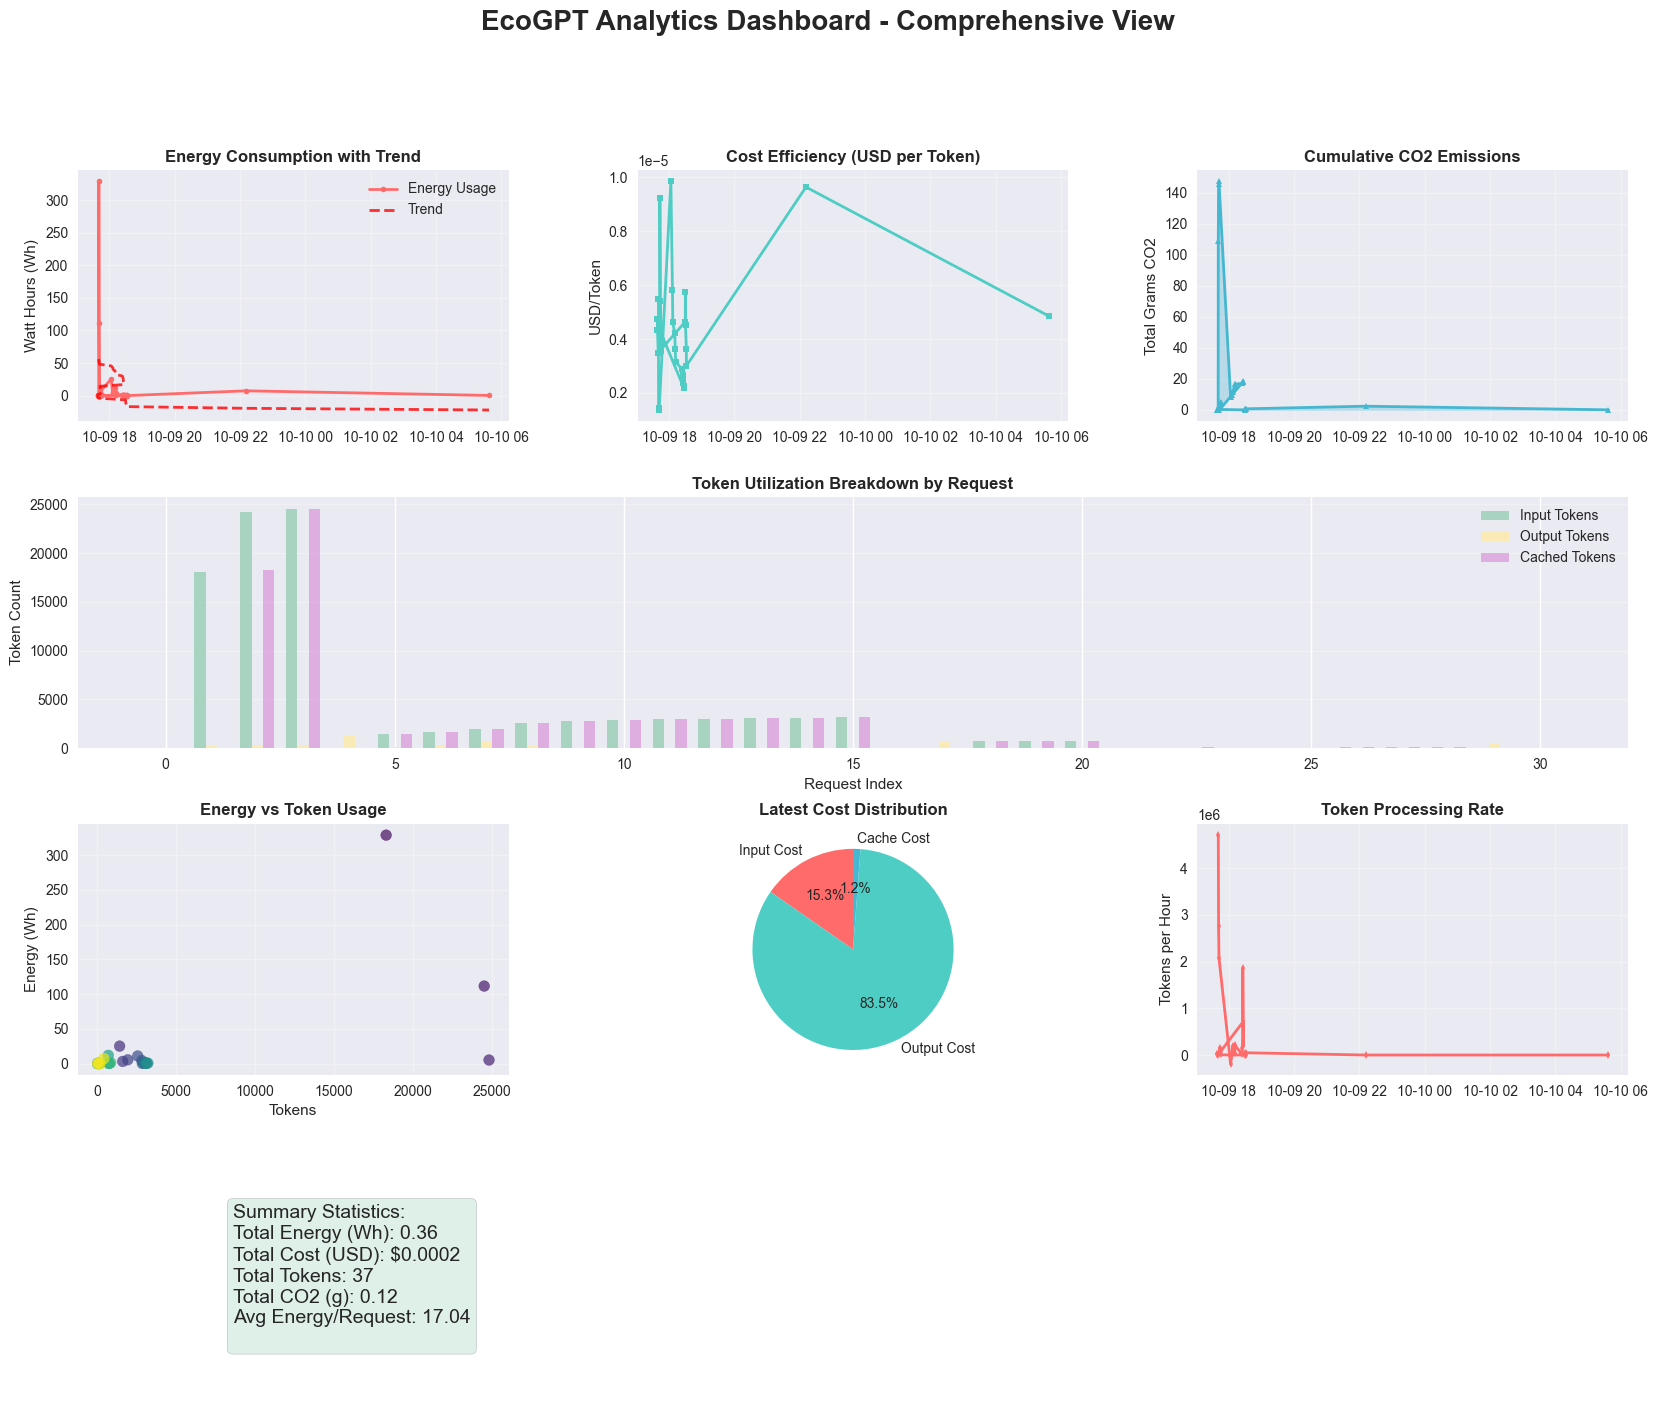

In [13]:
# Create a comprehensive dashboard with enhanced styling
plt.style.use('seaborn-v0_8-darkgrid')

# Set up the figure with custom styling
fig = plt.figure(figsize=(20, 16))
gs = fig.add_gridspec(4, 3, hspace=0.3, wspace=0.3)

# Define custom color palette
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']

# 1. Energy consumption with trend line
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(logs['datetime'], logs['wh'], 'o-', color=colors[0], linewidth=2, markersize=4, label='Energy Usage')
z = np.polyfit(range(len(logs)), logs['wh'], 1)
p = np.poly1d(z)
ax1.plot(logs['datetime'], p(range(len(logs))), "--", color='red', alpha=0.8, linewidth=2, label='Trend')
ax1.set_title('Energy Consumption with Trend', fontweight='bold', fontsize=12)
ax1.set_ylabel('Watt Hours (Wh)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Cost efficiency analysis
ax2 = fig.add_subplot(gs[0, 1])
cost_per_token = logs['total_usd'] / logs['total_tokens']
ax2.plot(logs['datetime'], cost_per_token, 's-', color=colors[1], linewidth=2, markersize=4)
ax2.set_title('Cost Efficiency (USD per Token)', fontweight='bold', fontsize=12)
ax2.set_ylabel('USD/Token')
ax2.grid(True, alpha=0.3)

# 3. Environmental impact
ax3 = fig.add_subplot(gs[0, 2])
ax3.plot(logs['datetime'], logs['total_co2'], '^-', color=colors[2], linewidth=2, markersize=4)
ax3.fill_between(logs['datetime'], logs['total_co2'], alpha=0.3, color=colors[2])
ax3.set_title('Cumulative CO2 Emissions', fontweight='bold', fontsize=12)
ax3.set_ylabel('Total Grams CO2')
ax3.grid(True, alpha=0.3)

# 4. Token utilization breakdown
ax4 = fig.add_subplot(gs[1, :])
if all(col in logs.columns for col in ['input_tokens', 'output_tokens', 'cached_tokens']):
    width = 0.25
    x = np.arange(len(logs))
    ax4.bar(x - width, logs['input_tokens'], width, label='Input Tokens', color=colors[3], alpha=0.8)
    ax4.bar(x, logs['output_tokens'], width, label='Output Tokens', color=colors[4], alpha=0.8)
    ax4.bar(x + width, logs['cached_tokens'], width, label='Cached Tokens', color=colors[5], alpha=0.8)
    ax4.set_title('Token Utilization Breakdown by Request', fontweight='bold', fontsize=12)
    ax4.set_ylabel('Token Count')
    ax4.set_xlabel('Request Index')
    ax4.legend()
    ax4.grid(True, alpha=0.3, axis='y')

# 5. Resource efficiency correlation
ax5 = fig.add_subplot(gs[2, 0])
ax5.scatter(logs['tokens'], logs['wh'], c=range(len(logs)), cmap='viridis', s=60, alpha=0.7)
ax5.set_title('Energy vs Token Usage', fontweight='bold', fontsize=12)
ax5.set_xlabel('Tokens')
ax5.set_ylabel('Energy (Wh)')
ax5.grid(True, alpha=0.3)

# 6. Cost breakdown pie chart (latest values)
ax6 = fig.add_subplot(gs[2, 1])
latest_costs = [logs['usd_in'].iloc[-1], logs['usd_out'].iloc[-1], logs['usd_cache'].iloc[-1]]
labels = ['Input Cost', 'Output Cost', 'Cache Cost']
ax6.pie(latest_costs, labels=labels, autopct='%1.1f%%', colors=colors[:3], startangle=90)
ax6.set_title('Latest Cost Distribution', fontweight='bold', fontsize=12)

# 7. Performance metrics over time
ax7 = fig.add_subplot(gs[2, 2])
if 'total_tokens' in logs.columns and len(logs) > 1:
    tokens_per_hour = logs['total_tokens'].diff() / (logs['datetime'].diff().dt.total_seconds() / 3600)
    ax7.plot(logs['datetime'][1:], tokens_per_hour[1:], 'd-', color=colors[0], linewidth=2, markersize=4)
    ax7.set_title('Token Processing Rate', fontweight='bold', fontsize=12)
    ax7.set_ylabel('Tokens per Hour')
    ax7.grid(True, alpha=0.3)

# 8. Summary statistics
ax8 = fig.add_subplot(gs[3, :])
ax8.axis('off')

# Create summary statistics table
summary_data = {
    'Metric': ['Total Energy (Wh)', 'Total Cost (USD)', 'Total Tokens', 'Total CO2 (g)', 'Avg Energy/Request'],
    'Value': [
        f"{logs['total_wh'].iloc[-1]:.2f}",
        f"${logs['total_usd'].iloc[-1]:.4f}",
        f"{logs['total_tokens'].iloc[-1]:,}",
        f"{logs['total_co2'].iloc[-1]:.2f}",
        f"{logs['wh'].mean():.2f}"
    ]
}

# Display summary table
table_text = "Summary Statistics:\n"
for metric, value in zip(summary_data['Metric'], summary_data['Value']):
    table_text += f"{metric}: {value}\n"

ax8.text(0.1, 0.5, table_text, fontsize=14, verticalalignment='center', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor=colors[3], alpha=0.3))

plt.suptitle('EcoGPT Analytics Dashboard - Comprehensive View', fontsize=20, fontweight='bold', y=0.98)
plt.show()

In [14]:
# Display key insights and recommendations
print("🔍 KEY INSIGHTS FROM THE DATA:")
print("=" * 50)

print(f"📊 Dataset Overview:")
print(f"   • Total requests analyzed: {len(logs)}")
print(f"   • Date range: {logs['datetime'].min().strftime('%Y-%m-%d %H:%M')} to {logs['datetime'].max().strftime('%Y-%m-%d %H:%M')}")

print(f"\n⚡ Energy Consumption:")
print(f"   • Total energy used: {logs['total_wh'].iloc[-1]:.2f} Wh")
print(f"   • Average per request: {logs['wh'].mean():.2f} Wh")
print(f"   • Peak consumption: {logs['wh'].max():.2f} Wh")

print(f"\n💰 Cost Analysis:")
print(f"   • Total cost: ${logs['total_usd'].iloc[-1]:.4f}")
print(f"   • Average cost per request: ${logs['total_usd'].iloc[-1]/len(logs):.4f}")
print(f"   • Cost per token: ${logs['total_usd'].iloc[-1]/logs['total_tokens'].iloc[-1]:.6f}")

print(f"\n🌱 Environmental Impact:")
print(f"   • Total CO2 emissions: {logs['total_co2'].iloc[-1]:.2f} g")
print(f"   • CO2 per request: {logs['g_co2'].mean():.2f} g")

print(f"\n🔤 Token Usage:")
print(f"   • Total tokens processed: {logs['total_tokens'].iloc[-1]:,}")
print(f"   • Average tokens per request: {logs['tokens'].mean():.0f}")

print(f"\n💡 RECOMMENDATIONS:")
print(f"   • Monitor requests with >100 Wh energy consumption")
print(f"   • Consider caching strategies for frequently used tokens")
print(f"   • Track cost efficiency trends for budget planning")

🔍 KEY INSIGHTS FROM THE DATA:
📊 Dataset Overview:
   • Total requests analyzed: 31
   • Date range: 2025-10-09 17:38 to 2025-10-10 05:37

⚡ Energy Consumption:
   • Total energy used: 0.36 Wh
   • Average per request: 17.04 Wh
   • Peak consumption: 328.64 Wh

💰 Cost Analysis:
   • Total cost: $0.0002
   • Average cost per request: $0.0000
   • Cost per token: $0.000005

🌱 Environmental Impact:
   • Total CO2 emissions: 0.12 g
   • CO2 per request: 5.62 g

🔤 Token Usage:
   • Total tokens processed: 37
   • Average tokens per request: 3349

💡 RECOMMENDATIONS:
   • Monitor requests with >100 Wh energy consumption
   • Consider caching strategies for frequently used tokens
   • Track cost efficiency trends for budget planning
